# Abstract

* In RL, finding a truely general and scalable unsupervised pre-training objective for generalist policies from offline data remains a major open question. 

* Based on principles such as goal-conditioned RL, behavior cloning, and unsupervised skill learning, such methods remain limited in terms of either the diversity of the discovered behaviors, the need for high-quality demonstration data, or the lack of a clear adaptation mechanism for down-stream tasks. 

* In this work, we propose a novel unsupervised framework to pre-train generalist policies that capture diverse, optimal, long-horizon behaviors from unlabeled offline data such that they can quickly adapted to any arbitrary new tasks in a zero-shot manner. 

* Key insight: learn a structured representation that preserves the temporal structure of the underlying environment, and then to span this learned latent space with directional movements, which enables various zero-shot policy "prompting" schemes for downstream tasks. 

* The unsupervised policies can solve goal-conditioned and general RL tasks in a zero-shot fashion, even often outperforming prior methods designed specifically for each setting. 


# Introduction
* Generalist models that can utilize large amounts of weakly labeled data provide an appealing recipe: pre-train via self-supervised or unsupervised objectives on large and diverse datasets without groundtruth labels, and then adapt efficiently via prompting, few-shot learing, or fine-tuning to downstream tasks. 

* A number of works have recently sought to propose self-supervised objectives to pre-train generalist policies for RL and control. We can broadly refer to the resulting models as foundation policies: general-purpose policies that can rapidly adapt to solve a variety of downstream tasks. 

* Finding the best policy pre-training objective from data remains a major open question in RL. 
    - behavioral cloning (BC) : requires expert demonstrations, limiting availability of data
    - offline goal-conditional RL (GCRL) : only yield goal-reaching behaviors and principled
    - unsupervised skill discovery

* The main idea is to discover the tempoeral structure of states through offline data, and to represent this structure in such a way that we can quickly and accurately obtain optimal policies for any arbitrary new tasks from relatively concise "prompts" 

* We begin by learning a geometric abstraction of the dataset, where distances between represntations of states correspond to their long-horizon global relationships. 

* The resulting multi-task policy has a number of attractive properties. 
    - First, it captures a variety of diverse bahaviors, or skills, from offline data. These behaviors can be hierarchically combined or fine-tuned to solve downstream tasks efficiently. 
    - Second, we can train this policy with offline RL (as opposed to BC), and thus can utilize suboptimal data, unlike BC-based policy pre-training methods. Moreover, the learned behaviors are provably optimal for solving goal-reaching tasks (under some assumptions), which makes our method subsume goal-conditional Rl as a special case, while providing for much more diverse behaviors. 
    - Third, thanks to the inner product parameterization, this multi-task policy provides a very efficient way to adapt to any arbitrary reward function, enabling zero-shot RL. 
    - Fourth, this pre-training procedure yields a highly structured Hilbert representation $\phi$, which enables efficient test time planning without training an additional model. Given the above versatiility of our multi-task policy, we call it a Hilbert foundation policy (HILP)

* HILPs capture diverse behaviors that can be directly used to solve goal-conditional RL and zero-shot RL without additional training. 

# Related Work

1. Representation learning for sequential decision making. 

* HILPs are based on a distance-preserving state representation $\phi$, and are related to prior work in presentation learning for RL and control. 
    - visual feature tuning
    - contrastive learning
    - dynamics modeling
    - goal conditioned RL
* Unlike prior works, which focus only on pre-training representations, our focus in on unsupervised pre-training of diverse behaviors (i.e., foundation policies). This enables solving downstream tasks in a zero-shot manner by simply "prompting" the foundation policy. 

2. Unsupervised policy pre-training: 

* The supervised learning-based methods share a limitation in that they assume demonstrations of high quality. Among offline RL-based policy pre-training approaches, offline goal-conditioned RL methods train goal-conditioned policies to reach any goal state from any other state. 
* Another line of work pre-trains multi-task policies with offline RL based on successor features and other generalized value function designs. 

* Prior methods: random reward functions or random features, while the other employ hand-crafted state features, off-the-shelf representation learning, or low-rank approximation of optimal successor representations to specify and prioritize which tasks to capture. 
* In this work, we prioritize _long-term temporal structure_, training state representation $\phi$ to capture the temperoral distances between state by geometrically abstracting the state space. 
* This leads to significantly better performance and scalability than prior successor feature- or generalized value function-based offline unsupervised RL methods.

* METRA
    - span a temporal distance-based abstraction of the state space based on similar directional objective with online rollouts. 
    - METRA cannot be directly applied to the offline setting as it assumes on-policy rollouts to train representation $\phi$. 
    - Difference: decouple representation learning and policy learning to enable offline policy pre-training from unlabeled data. 

# Preliminaries and Problem Setting

* Hilber space:
    - Intuitively, a Hilbert space can roughly be thought of as a "stricter" version of metric space, where there exists an inner product that is consistent with the metric. 

* Problem statement: we assume that we are given unlabeled trajectory data $\mathcal{D}$ which consists of state-action trajectories $\tau = (s_0, a_0, s_1, ..., s_T)$. We do not make any assumptions about the quality of these unlabeled trajectories: they can be optimal for some unknown tasks, suboptimal, completely random, or even a mixture of these. 

* Goal: pre-train a verastile latent-conditioned policy $\pi (a|s, z)$ where $z \in \mathcal{Z}$ denotes a latent vector (which we call a task or a skill) purely from the unlabeled offline data $\mathcal{D}$, without online interactions. 

# HILPs
1. Hilbert Representations

     - $\phi$ should map temporally similar states to spatially similar latent staets, so that it can abstract the dataste states while preserving their long-horizon global relationships. 
     - $\phi$ should be well-structured such that it provides a way to train a versatile multi-task policy $\pi (a|s, a)$ that can be easily "prompted" to solve a variety of downstream tasks. 

* Based on the desiderate, we set $\mathcal{Z}$ to be a Hilbert space, whihc not only provides a proper metric to quantify the similarity between latent states, but also provides an inner product that enables several principled ways to prompt the policy. 
* Intuitively, $\phi$ is a distance preserving embedding function where distances in the latent space correspond to the temporal distances in the origninal MDP. This enables $\phi$ to abstract the state space while maintaining the global relationships between states. 

* There are three potential limitations with 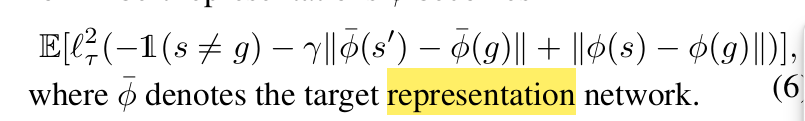
    1) the distance metric in $\mathcal{Z}$ is symmetric, whereas temporal distances might be asymmetrics. 
    2) Even when the environment dynamics are symmetric, there might not exist an exact isometry between the MDP and the Hilbert space
    3) We use a discount factor $\gamma$ but temporal distances are undiscounted. 

* In this regard, the objective might better be viewed as finding the best discounted Hilbert approximation of the MDP, rather than learning an exact Hilbert abstraction. 


# Final Remarks
Offline unsupervised policy pre-training is all about determining and prioritizing the right behaviors to capture from offline data. 
Prior works have proposed simply cloning dataset actions, capturing goal-reaching behaviors or learning to maximize linear combinations of state features. 
In this work, we proposed capturing long-horizon, state-spanning behaviors. This is desirable because such global behaviors are usually harder to learn than local behaviors, and thus are worth capturing during per-training. 


# Limitations
1. A symmetric Hilbert space might not be expressive enough to capture arbitrary MDPs - they might struggle in highly asymetric or disconnected MDPs where there might not exist a reasonable approximate isometry to a Hilbert space. We believe this limitation may be resolved by combining the notion of an inner product with a universal quasimetric embedding. 
2. The value-based representation learning objective might be optimistically biased in stochastic or partially observable environments. Combining the method with history conditioned policies or recurrent world models may be one possible solution to deal with such MDPs. 
3. The experiments assume the state space and environment dynamics to be the same at evaluation time. 
4. Finally, we use Euclidean spaces as Hilbert spaces for the experiments in the work. We believe applying HILPs to more general Hilbert spaces, such as the $L^2$ function space or reproducing kernel Hilbert spaces, may significantly enhance the expressivity of Hilbert representations. 


# Why are HILPs helpful

1. it captures a variety of diverse behaviors, or skills, from offline data. These behaviors can be hierarchically combined or fine-tuned to solve downstream tasks efficiently. 
2. Behaviors captured by HILPs are provably optimal for solving goal-reaching tasks, which makes our method sumsume goal-conditioned RL as a special case, while providing for much more diverse behaviors. 
3. The linear structure of the HILP reward enables zero-shot RL: at test time, we can immediately find the best latent vector z that solves a given task simply by linear regression
4. The HILP framework yields a highly strucuted Hilbert representation $\phi$ which enables efficient test-time planning without any additional training. 

In [1]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

# Define the kernel function (RBF kernel)
def kernel_function(x, y, gamma=0.1):
    return rbf_kernel(x, y, gamma=gamma)

# Sample state-action pairs
states = np.array([[1, 2], [3, 4], [5, 6]])
actions = np.array([[0], [1], [0]])

# Combine states and actions
state_action_pairs = np.hstack((states, actions))

# Compute the kernel matrix
K = kernel_function(state_action_pairs, state_action_pairs)

# Initialize weights (alpha)
alpha = np.random.rand(state_action_pairs.shape[0])

# Approximate value function
def value_function(state_action_pair):
    return np.dot(alpha, kernel_function(state_action_pairs, state_action_pair))

# Example usage
new_state_action_pair = np.array([[2, 3, 1]])
value = value_function(new_state_action_pair)
print("Approximated Value:", value)


Approximated Value: [1.01172143]
